In [5]:
#0. 작업 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#데이터 분할
from sklearn.model_selection import train_test_split
#모델 모듈(딥러닝)
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,SimpleRNN,LSTM,GRU,BatchNormalization,Flatten
from keras.optimizers import Adam,RMSprop,SGD,Adagrad
from keras.losses import binary_crossentropy,categorical_crossentropy,sparse_categorical_crossentropy,mean_squared_error
#모델 학습
from keras.callbacks import EarlyStopping,ModelCheckpoint
#모델 로드
from keras.models import load_model
#성능검토 
from sklearn.metrics import r2_score,classification_report,f1_score,mean_squared_error

In [6]:
import gdown
import os
import shutil
import pathlib

In [7]:
old_dir=pathlib.Path('./dogs-vs-cats/train')#기준 경로를 만들어라
new_dir=pathlib.Path('dogs-vs-cats_data')

In [8]:
from keras.utils import image_dataset_from_directory
tr_ds=image_dataset_from_directory(new_dir/'tr_data',batch_size=32,image_size=(180,180))
tt_ds=image_dataset_from_directory(new_dir/'tt_data',batch_size=32,image_size=(180,180))

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
tr_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
m=Sequential()
m.add(Input(shape=(180,180,3)))
m.add(Conv2D(32,3,1,padding='same',activation='relu'))
m.add(MaxPooling2D(2))
m.add(Conv2D(64,3,1,padding='same',activation='relu'))
m.add(MaxPooling2D(2))
m.add(Flatten())
m.add(Dense(100,activation='relu'))
m.add(Dense(1,activation='sigmoid'))
#m.summary()
m.compile(loss='binary_crossentropy',metrics=['acc'])
hy=m.fit(tr_ds,epochs=5)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 502ms/step - acc: 0.5550 - loss: 179.7280
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 592ms/step - acc: 0.7055 - loss: 0.6645
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 502ms/step - acc: 0.8000 - loss: 0.7489
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 509ms/step - acc: 0.8605 - loss: 0.5258
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 505ms/step - acc: 0.8730 - loss: 0.7537


In [11]:
#데이터 변환 계층(전처리계층)
from keras.layers import Rescaling,RandomZoom,RandomRotation,RandomFlip#데이터 증강 계층

In [12]:
m=Sequential()
m.add(Input(shape=(180,180,3)))
m.add(Rescaling(scale=1./255))#Rescaling(scale=1./127.5,offset=-1)-1~1
m.add(Conv2D(32,3,1,padding='same',activation='relu'))
m.add(MaxPooling2D(2))
m.add(Conv2D(64,3,1,padding='same',activation='relu'))
m.add(MaxPooling2D(2))
m.add(Flatten())
m.add(Dense(100,activation='relu'))
m.add(Dense(1,activation='sigmoid'))
#m.summary()
m.compile(loss='binary_crossentropy',metrics=['acc'])
hy=m.fit(tr_ds,epochs=3)

Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 485ms/step - acc: 0.5090 - loss: 1.7163
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 454ms/step - acc: 0.5650 - loss: 0.7048
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 450ms/step - acc: 0.6370 - loss: 0.6691


In [13]:
#데이터 증강 확인

(32, 180, 180, 3)


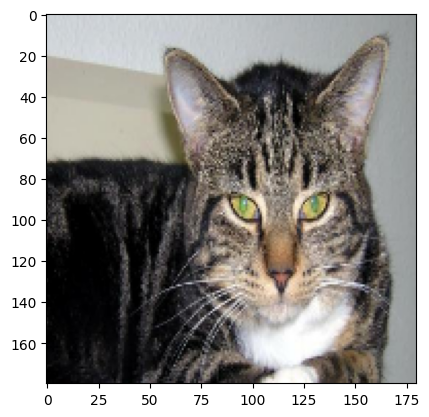

In [14]:
for imgs,ys in tr_ds.take(1):
    print(imgs.shape)
    plt.imshow(imgs[0].numpy().astype('uint8'))
    plt.show()
    break

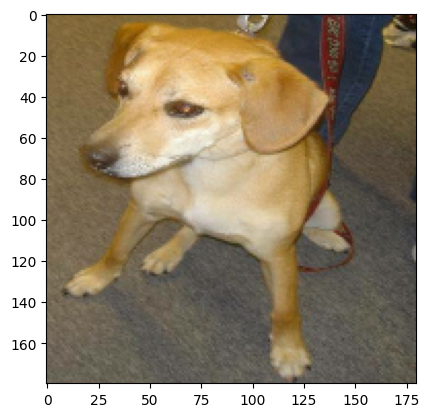

In [15]:
for imgs,ys in tr_ds:
    plt.imshow(imgs[0].numpy().astype('uint8'))
    plt.show()
    break

In [16]:
from keras.layers import Rescaling,RandomZoom,RandomRotation,RandomFlip # 데이터 증강 계층

(32, 180, 180, 3)


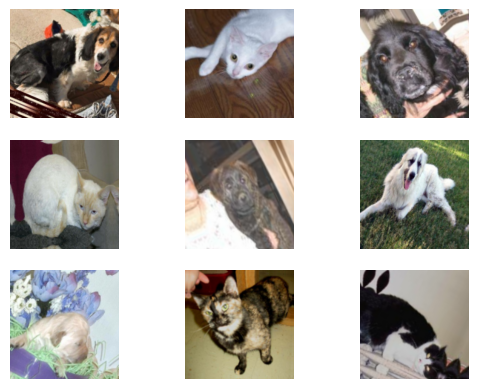

In [17]:
data_add_m=Sequential()
data_add_m.add(RandomZoom(0.2))
data_add_m.add(RandomRotation(0.1))
for imgs,ys in tr_ds:
    data1=data_add_m(imgs)
    print(data1.shape)
    for k in range(9):
        ax=plt.subplot(3,3,1+k)
        plt.imshow(data1[k].numpy().astype('uint8'))
        plt.axis('off')
    plt.show()
    break